In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score

In [4]:
# Load data set
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [5]:
# Read data set
data = pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [6]:
data.shape

(400, 11)

In [7]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [8]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

We have to build a Random Forest model with target variable 'Sales'. Thus,we will first convert it in categorical variable.

In [9]:
Sales_worth=pd.cut(np.array(data["Sales"].values),3, labels=["Low", "Medium", "High"])
data["Sales_worth"]=Sales_worth
data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_worth
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes,Medium
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No,Medium
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes,High
8,6.54,132,110,0,108,124,Medium,76,10,No,No,Medium
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes,Low


Now, we will use OrdinalEncoder() to transform Categorical values of ['ShelveLoc','Urban', 'US'] columns to ordinal one.

In [10]:
cols=['ShelveLoc','Urban', 'US','Sales']

In [11]:
from sklearn.preprocessing import LabelEncoder
data[cols]=data[cols].apply(LabelEncoder().fit_transform)
data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_worth
0,255,138,73,11,276,120,0,42,17,1,1,Medium
1,297,111,48,16,260,83,1,65,10,1,1,High
2,267,113,35,10,269,80,2,59,12,1,1,Medium
3,158,117,100,4,466,97,2,55,14,1,1,Medium
4,37,141,64,3,340,128,0,38,13,1,0,Low
5,290,124,113,13,501,72,0,78,16,0,1,Medium
6,133,115,105,0,45,108,2,71,15,1,0,Medium
7,306,136,81,15,425,120,1,67,10,1,1,High
8,129,132,110,0,108,124,2,76,10,0,0,Medium
9,55,132,113,0,131,124,2,76,17,0,1,Low


**<h4>Exploratory Data Analysis</h4>**

<Axes: >

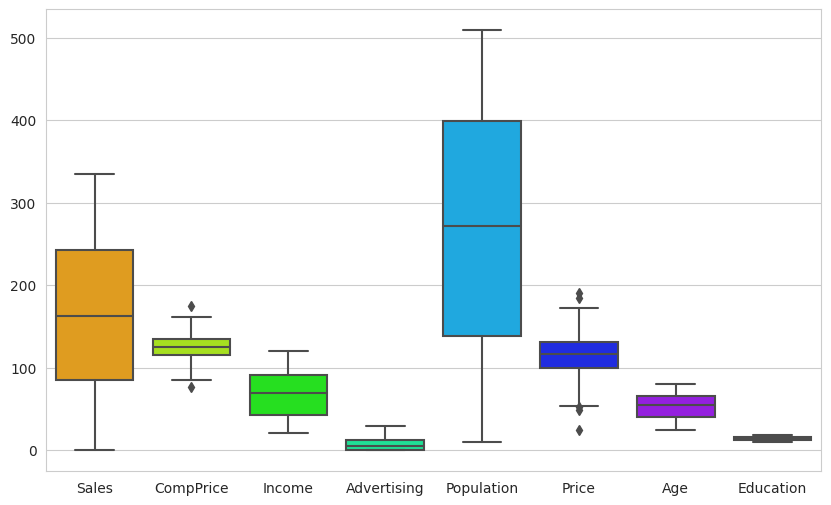

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data.loc[:,['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education']],palette="hsv")

CompPrice and Price columns are showing outliers but they can vary.

165.225
0.056848419636136724


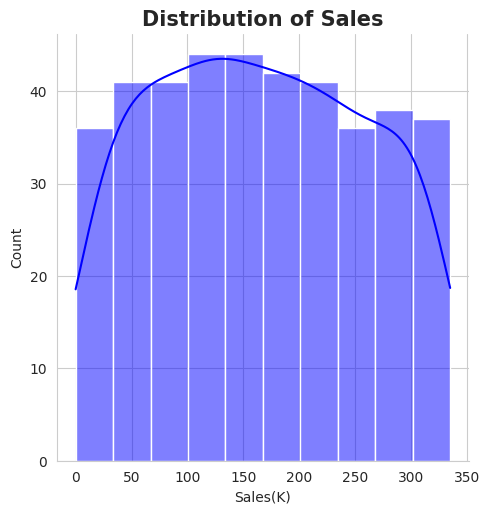

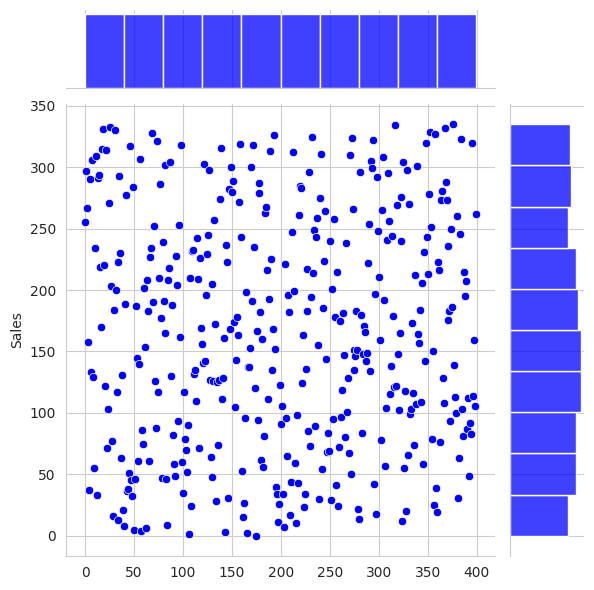

In [13]:
sns.displot(data=data['Sales'],color="b",kde=True)
plt.title("Distribution of Sales",fontweight="bold",fontsize=15)
plt.xlabel("Sales(K)")
sns.jointplot(data=data['Sales'],color="b")
print(data["Sales"].mean())
print(data["Sales"].skew())

Sales values are uniformly distributed with mean sale of around 165.225 Thousands.

Text(0.5, 1.0, 'Countplot of Sales worth')

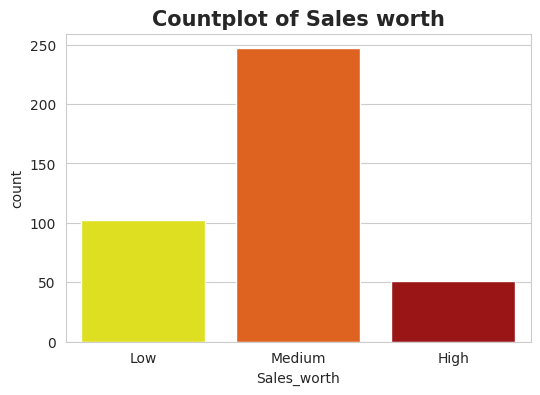

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x=data['Sales_worth'],palette="hot_r")
plt.title("Countplot of Sales worth",fontweight="bold",fontsize=15)

For majority of stores sale is medium.

Text(0.5, 1.0, 'Distribution of CompPrice')

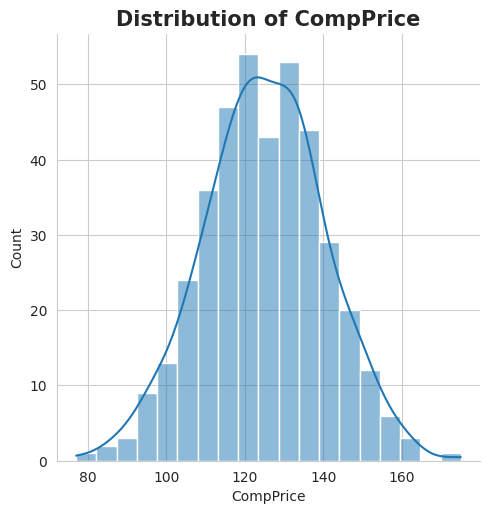

In [15]:
sns.displot(x="CompPrice",data=data,kde=True)
data['CompPrice'].skew()
plt.title("Distribution of CompPrice",fontweight="bold",fontsize=15)

CompPrice values are uniformly distributed.<br>
(CompPrice=Price charged by competitor)

Mean income level 68.6575


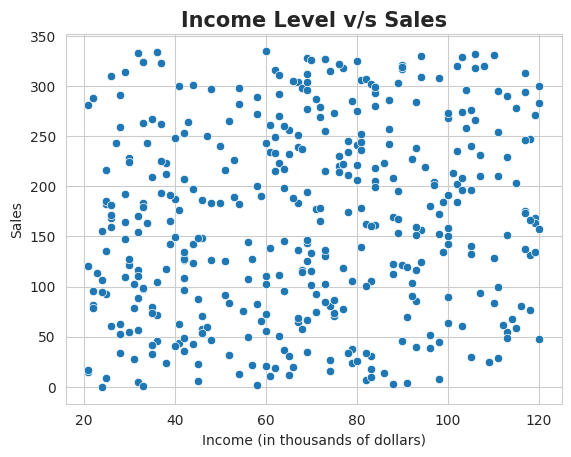

In [16]:
sns.scatterplot(x="Income",y="Sales",data=data)
plt.xlabel("Income (in thousands of dollars)")
plt.title("Income Level v/s Sales",fontweight="bold",fontsize=15)
print("Mean income level",data['Income'].mean())

Text(0.5, 1.0, 'Distribution of Community Income Level')

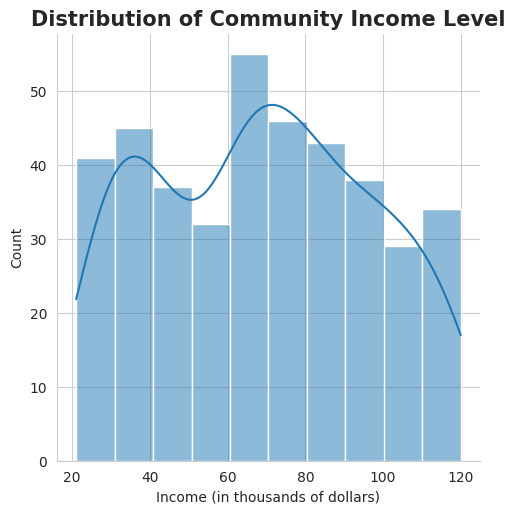

In [17]:
sns.displot(x=data["Income"],data=data,kde=True)
plt.xlabel("Income (in thousands of dollars)")
plt.title("Distribution of Community Income Level",fontweight="bold",fontsize=15)

Average Community income level ranges from 60-80 thousands of dollars.

Mean advertising budget- 6.635


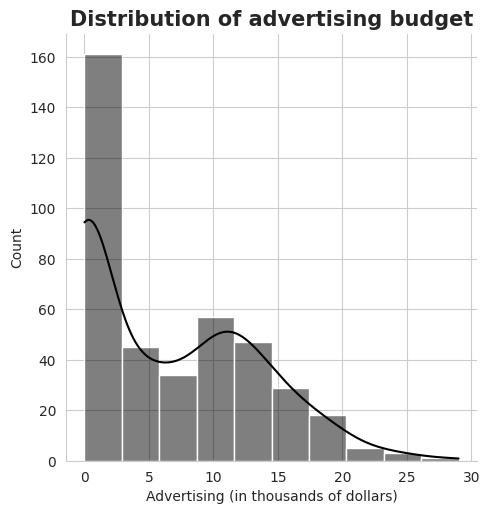

In [18]:
sns.displot(x=data["Advertising"],data=data,color="black",kde=True)
plt.xlabel("Advertising (in thousands of dollars)")
plt.title("Distribution of advertising budget",fontweight="bold",fontsize=15)
print("Mean advertising budget-",data['Advertising'].mean())

At around 160 stores advertising budget is low ranging between 0 to 2.5 thousands of dollars.

Text(0.5, 1.0, 'Advertising v/s Sales')

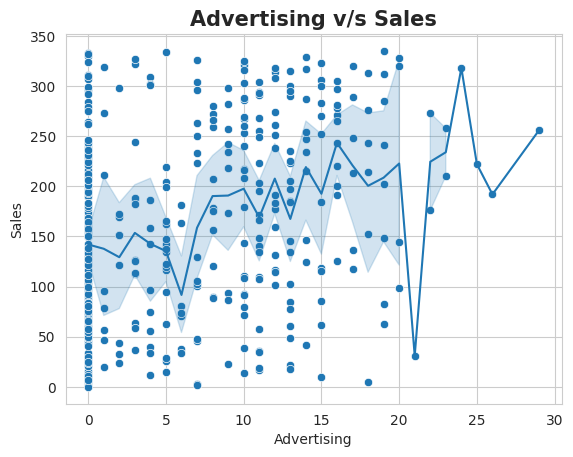

In [19]:
sns.scatterplot(x="Advertising",y="Sales",data=data)
sns.lineplot(x="Advertising",y="Sales",data=data)
plt.title("Advertising v/s Sales",fontweight="bold",fontsize=15)

From above plot, we can remark that Gross sales rises at some stores with high Advertising budget.

Text(0.5, 1.0, 'Distribution of Population size in region')

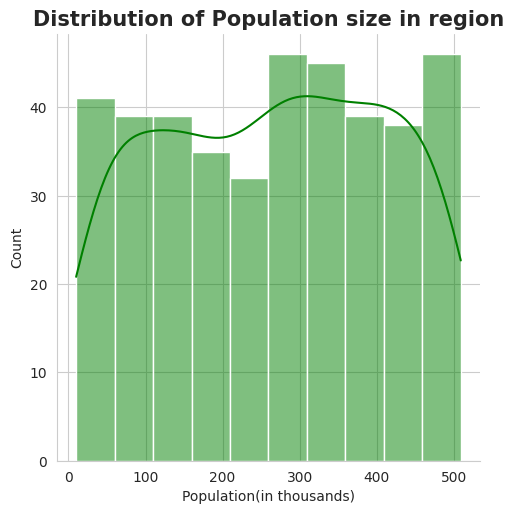

In [20]:
sns.displot(x=data["Population"],data=data,color="g",kde=True)
plt.xlabel("Population(in thousands)")
plt.title("Distribution of Population size in region",fontweight="bold",fontsize=15)

More than 40 regions have maximun population ranging between 450-500 thousands.

([<matplotlib.axis.XTick at 0x7a7e1d3d2d70>,
 [Text(0, 0, 'Bad'), Text(1, 0, 'Good'), Text(2, 0, 'Medium')])

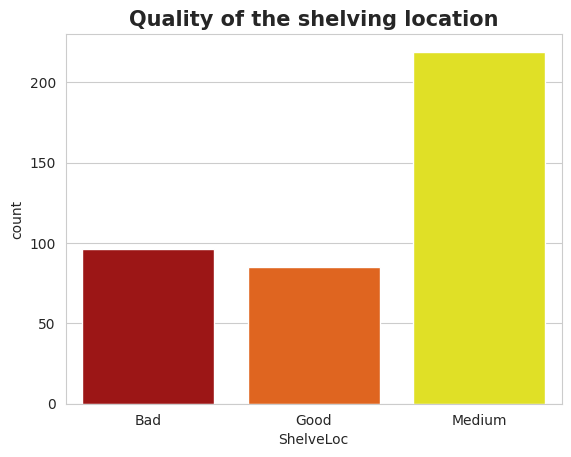

In [23]:
sns.countplot(x=data["ShelveLoc"],palette="hot")
plt.title("Quality of the shelving location",fontweight="bold",fontsize=15)
plt.xticks((0,1,2), ["Bad","Good","Medium"], rotation ='horizontal')

At 200 plus stores quality of the shelving location for the car seats is Medium.

Text(0.5, 1.0, 'Shelving location V/S Sales')

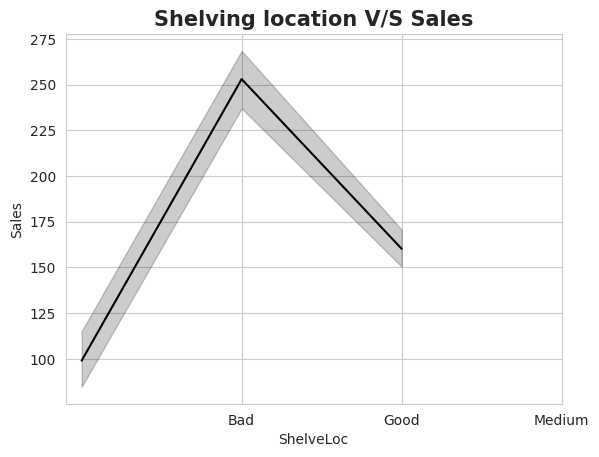

In [22]:
sns.lineplot(x="ShelveLoc",y="Sales",data=data,color="black")
plt.xticks((1,2,3), ["Bad","Good","Medium"], rotation ='horizontal')
plt.title("Shelving location V/S Sales",fontweight="bold",fontsize=15)

Above lineplot indicates that if quality of the shelving location is good sales rises.

Text(0.5, 1.0, 'Age v/s Sales')

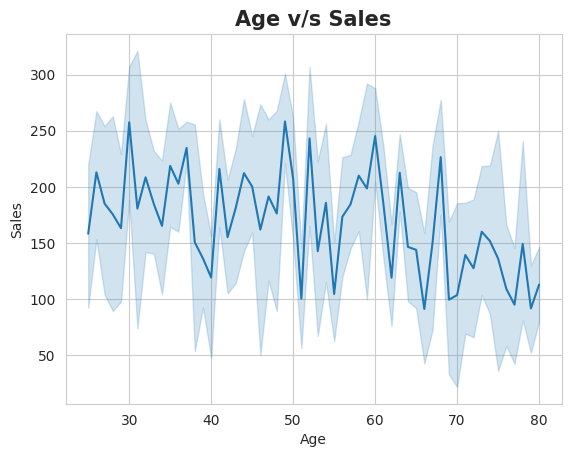

In [24]:
sns.lineplot(x="Age",y="Sales",data=data)
plt.title("Age v/s Sales",fontweight="bold",fontsize=15)

From the above lineplot we can observe that,with aged population there is a slight decrease in the sales values.

1    282
0    118
Name: Urban, dtype: int64


Text(0.5, 1.0, 'Store Location')

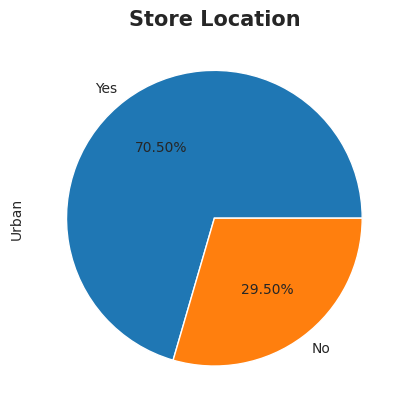

In [25]:
data["Urban"].value_counts().plot(kind="pie",autopct='%.2f%%',labels=["Yes","No"])
print(data["Urban"].value_counts())
plt.title("Store Location",fontweight="bold",fontsize=15)

70.50% stores are loacted in Urban area.

1    258
0    142
Name: US, dtype: int64


Text(0.5, 1.0, 'US Location')

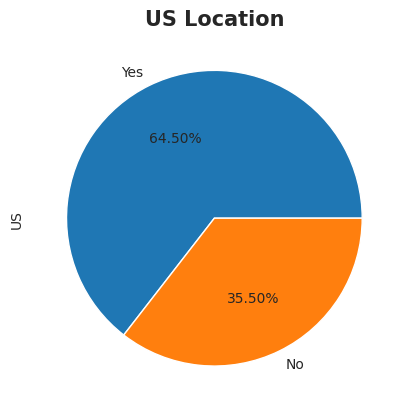

In [26]:
data["US"].value_counts().plot(kind="pie",autopct='%.2f%%',labels=["Yes","No"])
print(data["US"].value_counts())
plt.title("US Location",fontweight="bold",fontsize=15)

64.50% stores are loacted in US area.

Text(0.5, 0, 'Urban v/s Rural')

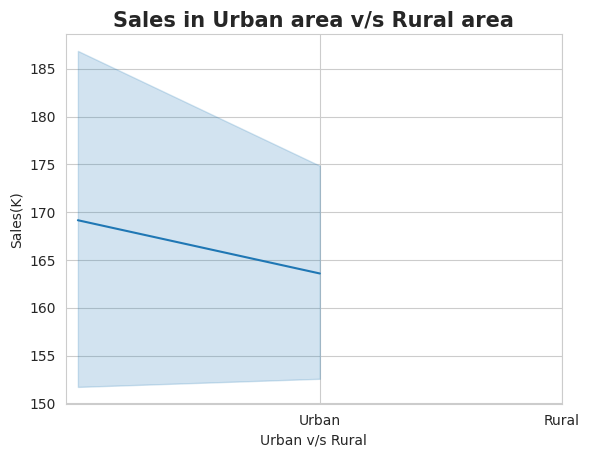

In [27]:
sns.lineplot(x="Urban",y="Sales",data=data)
plt.title("Sales in Urban area v/s Rural area",fontweight="bold",fontsize=15)
plt.xticks((1,2), ["Urban","Rural"], rotation ='horizontal')
plt.ylabel("Sales(K)")
plt.xlabel("Urban v/s Rural")

From above lineplot, we can say that average sales of stores in Rural area is slightly more.

In [ ]:
from matplotlib import colors
sns.lineplot(x="US",y="Sales",data=data)
plt.title("Sales in US region v/s Outside US region",fontweight="bold",fontsize=15)
plt.xticks((1,2), ["Us","Outside"], rotation ='horizontal')
plt.ylabel("Sales(K)")
plt.xlabel("US v/s Outside")

From above lineplot, we can say that average sales in the US region is high.

In [28]:
data.corr()

<ipython-input-28-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.059040,0.154353,0.288179,0.043045,-0.428046,0.167251,-0.233322,-0.031917,-0.026933,0.183155
CompPrice,0.059040,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.154353,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.288179,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.043045,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.428046,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.167251,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.233322,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.031917,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.026933,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


<ipython-input-29-0aeedd5e499a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap="viridis")


<Axes: >

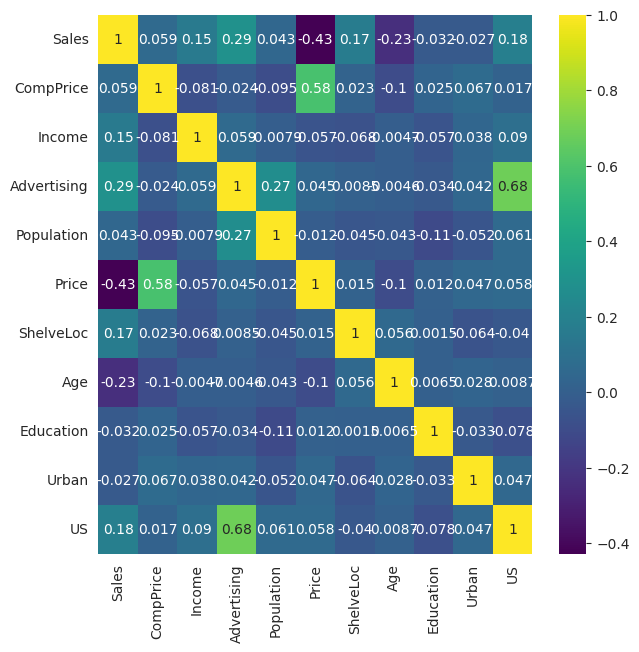

In [29]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True,cmap="viridis")

**<h4>"Building a model"</h4>**

We have to build a model to know about attributes causing high sale

In [30]:
# Calling train_test function
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X=data.iloc[:,1:11]
y=data.iloc[:,11]

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [32]:
X_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
177,138,72,0,148,94,2,27,17,1,1
105,104,100,8,398,97,2,61,11,1,1
5,124,113,13,501,72,0,78,16,0,1
288,116,40,0,74,97,2,76,15,0,0
279,141,57,13,376,158,2,64,18,1,1
...,...,...,...,...,...,...,...,...,...,...
230,115,60,0,119,114,0,38,14,0,0
98,122,77,24,382,127,1,36,16,0,1
322,140,50,10,300,139,1,60,15,1,1
382,121,28,19,315,121,2,66,14,1,1


In [33]:
y_train

177    Medium
105    Medium
5      Medium
288    Medium
279       Low
        ...  
230       Low
98       High
322    Medium
382       Low
365    Medium
Name: Sales_worth, Length: 280, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [34]:
X_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
234,115,62,11,289,129,1,56,16,0,1
42,77,69,0,25,24,2,50,18,1,0
303,133,52,16,290,99,2,43,11,1,1
155,98,72,0,59,69,2,65,16,1,0
342,137,102,13,422,118,2,71,10,0,1
...,...,...,...,...,...,...,...,...,...,...
93,145,30,0,67,104,2,55,17,1,0
260,129,117,8,400,101,0,36,10,1,1
188,116,37,0,426,90,2,76,15,1,0
284,106,46,11,414,96,0,79,17,0,0


In [35]:
y_test

234    Medium
42     Medium
303    Medium
155    Medium
342    Medium
        ...  
93     Medium
260    Medium
188    Medium
284    Medium
189      High
Name: Sales_worth, Length: 120, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [36]:
print("Shape : ")
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

Shape : 
X_train (280, 10)
y_train (280,)
X_test (120, 10)
y_test (120,)


In [37]:
# Calling modelling function
model=RandomForestClassifier(criterion="gini",max_depth=15)
model_train=model.fit(X_train,y_train)

In [38]:
pred=model_train.predict(X_test)
pred

array(['Medium', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'High',
       'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'High', 'Medium', 'Low', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'High', 'Medium', 'Low', 'Medium', 'Medium', 'High',
       'Medium'

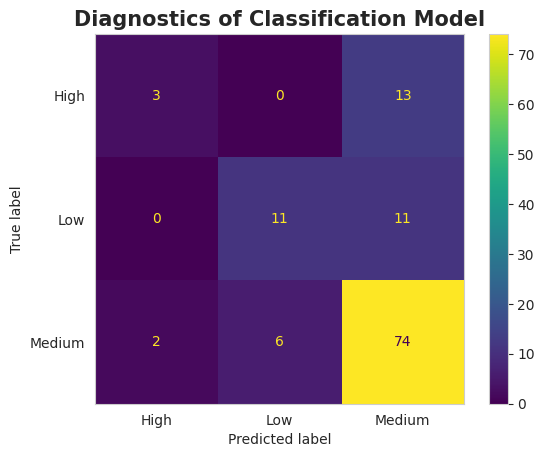

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
result=confusion_matrix(y_test,pred)
ConfusionMatrixDisplay(result,display_labels=model_train.classes_).plot()
plt.title("Diagnostics of Classification Model",fontweight="bold",fontsize=15)
plt.grid(False)
plt.show()

In [40]:
"Accuracy score"
accuracy_score(y_test,pred)

0.7333333333333333

In [41]:
"Misclassification"
1-accuracy_score(y_test,pred)

0.2666666666666667

In [42]:
"Classification Report"
classification_report(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        High       0.60      0.19      0.29        16
         Low       0.65      0.50      0.56        22
      Medium       0.76      0.90      0.82        82

    accuracy                           0.73       120
   macro avg       0.67      0.53      0.56       120
weighted avg       0.71      0.73      0.70       120



**<h4>Lets change the criterion to "entropy".</h4>**

In [43]:
model=RandomForestClassifier(criterion="entropy",max_depth=15)
model_train=model.fit(X_train,y_train)

In [44]:
pred=model_train.predict(X_test)
pred

array(['Medium', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'High',
       'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'Medium', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'High',
       'Medium', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium',
       'Low', 'Medium', 'Medium', 'High', 'Medium', 'Medium',

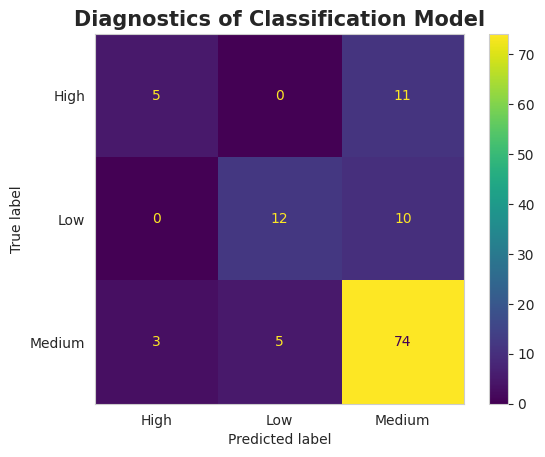

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
result=confusion_matrix(y_test,pred)
ConfusionMatrixDisplay(result,display_labels=model_train.classes_).plot()
plt.title("Diagnostics of Classification Model",fontweight="bold",fontsize=15)
plt.grid(False)
plt.show()

In [ ]:
# Accuracy score
accuracy_score(y_test,pred)

In [47]:
# Misclassification
1-accuracy_score(y_test,pred)

0.2416666666666667

In [48]:
classification_report(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        High       0.62      0.31      0.42        16
         Low       0.71      0.55      0.62        22
      Medium       0.78      0.90      0.84        82

    accuracy                           0.76       120
   macro avg       0.70      0.59      0.62       120
weighted avg       0.75      0.76      0.74       120



**<h4>Random Forest model with entropy criterion gave us better accuracy.</h4>**

In [49]:
model_train.feature_importances_

array([0.10492483, 0.10343919, 0.08210215, 0.09229453, 0.20291835,
       0.19005277, 0.12636969, 0.06469712, 0.01411062, 0.01909077])

<Axes: >

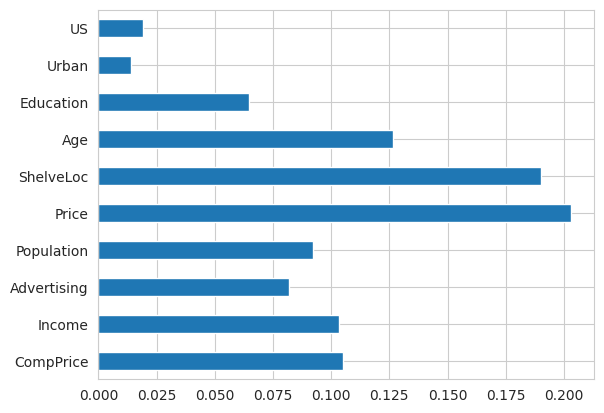

In [50]:
feat_impt=pd.Series(model_train.feature_importances_,index=X.columns)
feat_impt.plot(kind="barh")

Shelving location,Price,Age,CompPrice are some top attributes contributing to the sales worth high.